1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [5]:
import numpy as np
import scipy as sp
from scipy import interpolate
import matplotlib.pyplot as plt

%matplotlib inline
#plt.style.use('ggplot')
%precision 4
#np.set_printoptions(suppress=True)

max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

# Cumulative distribution function creation
cprob = np.array([(i)/(years_nb+1) for i in range(1, years_nb+1)])

# Quantile function creation
sorted_max_speeds = np.sort(max_speeds)
quantile_func = sp.interpolate.UnivariateSpline(cprob, sorted_max_speeds)

fifty_prob = 1. - 0.02
fifty_wind = quantile_func(fifty_prob)

print('Max wind speed in 50 years:', fifty_wind)


Max wind speed in 50 years: 32.97989844019469


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

        Month  MAX_temp  min_temp
0     January        17       -62
1    February        19       -59
2       March        21       -56
3       April        28       -46
4         May        33       -32
5        June        38       -18
6        July        37        -9
7      August        37       -13
8   September        31       -25
9     October        23       -46
10   November        19       -52
11   December        18       -58


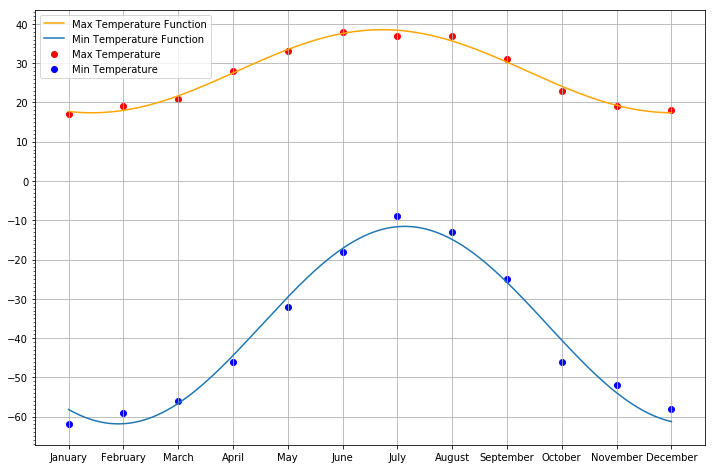

In [63]:
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy import optimize

mxTemp = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
mnTemp = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d = {'Month':month, 'MAX_temp':mxTemp, 'min_temp':mnTemp }
temp_ex = pd.DataFrame(data=d)
print(temp_ex)

# Plot these temperature extremes
plt.figure(figsize=(12, 8))
ax = plt.subplot()
ax.scatter(temp_ex['Month'], temp_ex['MAX_temp'], color='red', label='Max Temperature')
ax.scatter(temp_ex['Month'], temp_ex['min_temp'], color='blue', label='Min Temperature')
ax.grid()
ax.yaxis.set_major_locator(MultipleLocator(10.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

# Define a function that can describe min and max temperatures
def f(x, A1, f1, Off1, ph1):
    return Off1+A1*np.sin(f1*x+ph1)

# Fit this function to the data
time = np.linspace(0, 2*np.pi, 12)
pMax, params_covarianceMax = optimize.curve_fit(f, time, temp_ex['MAX_temp'], p0=[10, 1, 27, 0])
pMin, params_covarianceMin = optimize.curve_fit(f, time, temp_ex['min_temp'], p0=[26, 1, -36, 0])

# Plot the result
ax.plot(np.linspace(0, 2*np.pi, 1000)*5.5/np.pi, f(np.linspace(0, 2*np.pi, 1000), pMax[0], pMax[1], pMax[2], pMax[3]), label='Max Temperature Function', color='orange')
ax.plot(np.linspace(0, 2*np.pi, 1000)*5.5/np.pi, f(np.linspace(0, 2*np.pi, 1000), pMin[0], pMin[1], pMin[2], pMin[3]), label='Min Temperature Function')

ax.legend()
plt.show()

* Plot the result. Is the fit reasonable? If not, why?

In the Max case the fit seems quite good, quite close to the real temperatures, the Min one is more imprecise but still acceptable


* Is the time offset for min and max temperatures the same within the fit accuracy?

The two sinusoids' initial phases are different in order to achieve a better accuracy

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


Value of the principal global min: -1.0316284534898774


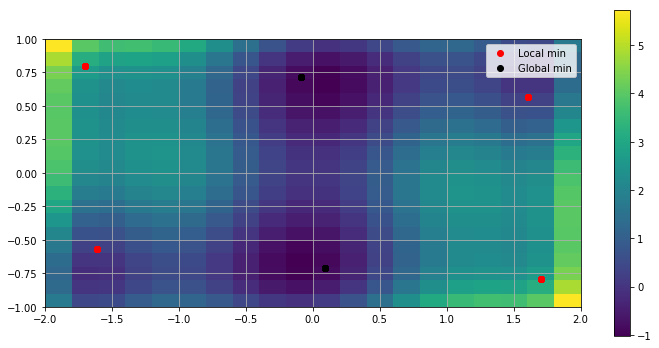

      fun: 0.0
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.e-08, -4.e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
   status: 0
  success: True
        x: array([0., 0.])


In [112]:
def f(xy):
    return (4-2.1*xy[0]**2+(1/3)*xy[0]**4)*xy[0]**2+xy[0]*xy[1]+(4*xy[1]**2-4)*xy[1]**2

# Use numpy.meshgrid() and pylab.imshow() to find visually the regions
extrs =[[-2, 2], [-1, 1]]
x = np.linspace(-2, 2, 20)
y = np.linspace(-1, 1, 20)
vx, vy = np.meshgrid(x, y) 

plt.figure(figsize=(12,6))
plt.imshow(f([vx, vy]), extent=[-2, 2, -1, 1])
plt.colorbar()
plt.grid()

# Use scipy.optimize.minimize()
vx = vx.flatten()
vy = vy.flatten()
lc_min = np.array([optimize.minimize(f, x0=[x,y], bounds=extrs) for (x,y) in zip(vx, vy)])
xy_min = np.array([fmin.x for fmin in lc_min])
vl_min = np.array([fmin.fun for fmin in lc_min])
gl_min = vl_min.min()
print('Value of the principal global min:', gl_min)

mask1 = vl_min<=gl_min+10**(-10)
mask2 = vl_min>=gl_min-10**(-10)
mask = np.logical_and(mask1, mask2)
xy_gl_min = xy_min[mask,:]

plt.scatter(xy_min[:,0], xy_min[:,1], color='red', label='Local min')
plt.scatter(xy_gl_min[:,0], xy_gl_min[:,1], color='black', label='Global min')
plt.legend()
plt.show()

print(optimize.minimize(f, x0=[0,0], bounds=extrs))

How many global minima are there, and what is the function value at those points? What happens for an initial guess of  (𝑥,𝑦)=(0,0)?

The global minima found are 2, considering a certain error. Using (0, 0) as initial guess the algorithm will keep those coordinates as a local min.

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population.

Plot the power in function of the frequency.

Hares population peak frequency: 0.09523809523809523
Lynxes population peak frequency: 0.09523809523809523
Carrots population peak frequency: 0.09523809523809523


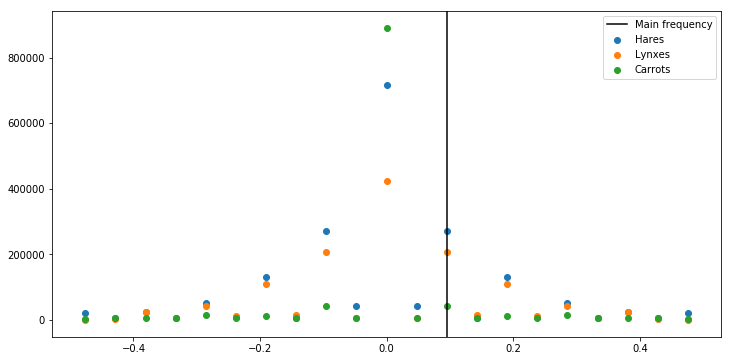

In [130]:
from scipy import fftpack

# Import data
data = np.loadtxt('populations.txt')
year = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

# FFT 
har_fft = fftpack.fft(hares)
lyn_fft = fftpack.fft(lynxes)
car_fft = fftpack.fft(carrots)

# Power
har_pow = np.abs(har_fft)
lyn_pow = np.abs(lyn_fft)
car_pow = np.abs(car_fft)

# Peak search
sample_freq = fftpack.fftfreq(year.size, d=1)

pos_mask = np.where(sample_freq>0)
freqs = sample_freq[pos_mask]
har_peak_freq = freqs[har_pow[pos_mask].argmax()]
lyn_peak_freq = freqs[lyn_pow[pos_mask].argmax()]
car_peak_freq = freqs[car_pow[pos_mask].argmax()]

# Results and plot
print('Hares population peak frequency:', har_peak_freq)
print('Lynxes population peak frequency:', lyn_peak_freq)
print('Carrots population peak frequency:', car_peak_freq)

plt.figure(figsize=(12, 6))
plt.scatter(sample_freq, har_pow, label='Hares')
plt.scatter(sample_freq, lyn_pow, label='Lynxes')
plt.scatter(sample_freq, car_pow, label='Carrots')
plt.axvline(har_peak_freq, color='black', label='Main frequency')

plt.legend()
plt.show()

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

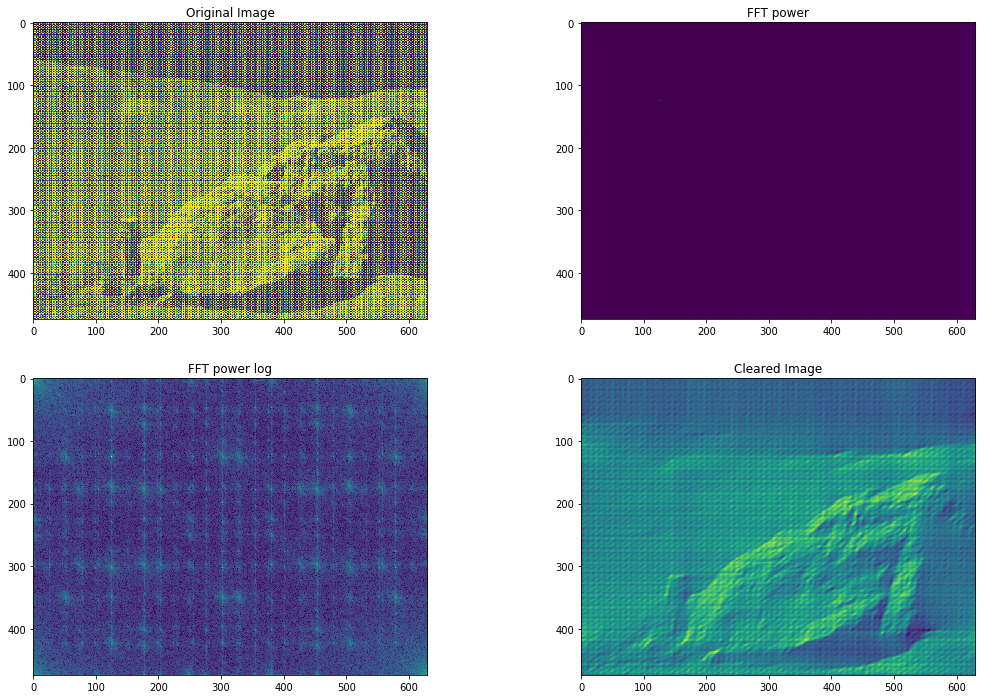

In [169]:
import pylab
from matplotlib.colors import LogNorm

# Load image
image = plt.imread('moonlanding.png')
data = plt.imread('moonlanding.png')

# FFT
im_fft = fftpack.fft2(data)
im_pow = np.abs(im_fft)

# Plot image
plt.figure(figsize=(18, 12))
ax1 = plt.subplot(2, 2, 1)
ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = plt.subplot(2, 2, 2)

# The fft cannot be plotted because contains complex number
# The power can be plotted, but it's better to use a logarithimc scale in order to visualize something
ax2.imshow(im_pow)
ax2.set_title('FFT power')
ax3 = plt.subplot(2, 2, 3)
ax3.imshow(im_pow, norm=LogNorm(vmin=5))
ax3.set_title('FFT power log')

# Remove high frequencies
im_fft[:, 80:] = 0
im_fft[80:, :] = 0

# Inverse fft
cl_im = np.real(sp.fftpack.ifft2(im_fft))

# Plot results
ax4 = plt.subplot(2, 2, 4)
ax4.set_title('Cleared Image')
ax4.imshow(cl_im)

plt.show()